In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pca-for-fashion-mnist-classification/sample_submission.csv
/kaggle/input/pca-for-fashion-mnist-classification/t10k-images-idx3-ubyte
/kaggle/input/pca-for-fashion-mnist-classification/train-labels-idx1-ubyte
/kaggle/input/pca-for-fashion-mnist-classification/train-images-idx3-ubyte


In [131]:
import struct
import numpy as np

def load_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = []
        for d in range(dims):
            shape.append(struct.unpack('>I', f.read(4))[0])
        
        shape = tuple(shape)
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [132]:
x = load_idx('/kaggle/input/pca-for-fashion-mnist-classification/train-images-idx3-ubyte')
y = load_idx('/kaggle/input/pca-for-fashion-mnist-classification/train-labels-idx1-ubyte')
print(x.shape)
print(y.shape)

(60000, 28, 28)
(60000,)


In [133]:
x = x.reshape(-1,28,28,1)
x.shape

(60000, 28, 28, 1)

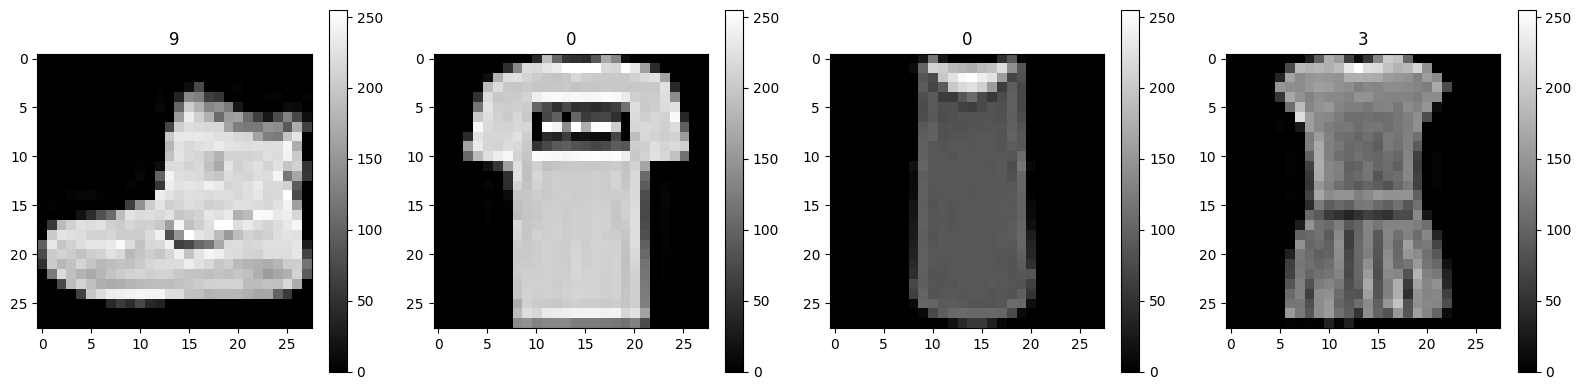

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(x[i] , cmap = 'gray')
    plt.title(y[i])
    plt.colorbar()
    plt.grid(False)
plt.tight_layout() 
plt.show()

In [135]:
x = x/255.0

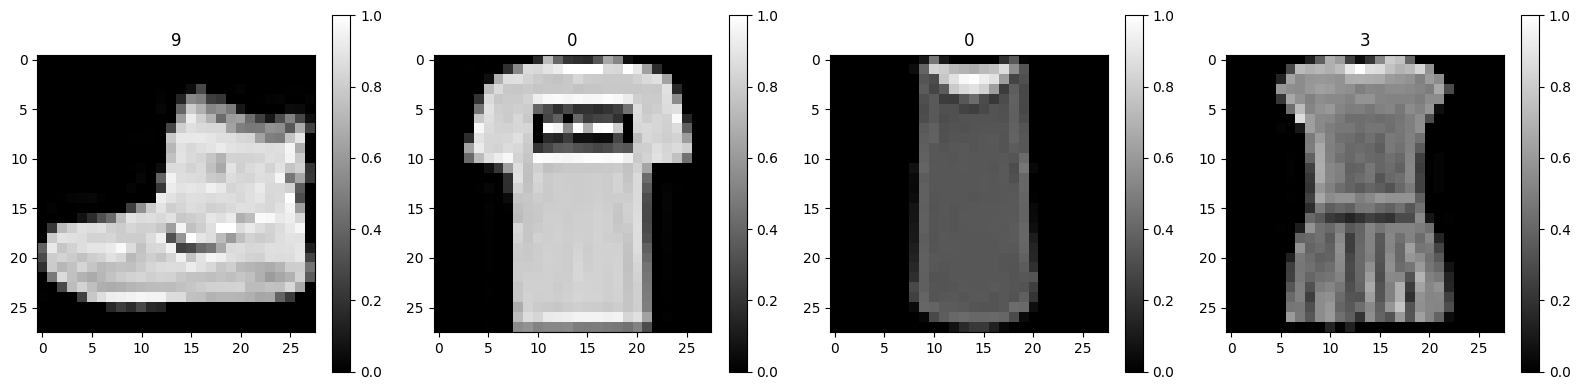

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(x[i] , cmap = 'gray')
    plt.title(y[i])
    plt.colorbar()
    plt.grid(False)
plt.tight_layout() 
plt.show()

In [137]:
print(y.shape , y.ndim)
y[0:10]

(60000,) 1


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [138]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=10)

In [139]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(x, y, test_size=0.3, random_state=42)

In [161]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten ,MaxPooling2D , BatchNormalization

import tensorflow as tf
from tensorflow.keras import layers, models
from keras import backend as K


from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Clear the Keras session
K.clear_session()

In [162]:
# Initialize a sequential model
model = Sequential()


# Set the weight decay value for L2 regularization
weight_decay = 0.0001

# Add the first convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), 
                 input_shape=(28,28,1)))
# Add batch normalization layer
model.add(BatchNormalization())

# Add the second convolutional layer similar to the first
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# Add the first max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer with 0.2 dropout rate
model.add(Dropout(rate=0.2))

# Add the third and fourth convolutional layers with 64 filters
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))   
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# Add the second max pooling layer and increase dropout rate to 0.3
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# Add the fifth and sixth convolutional layers with 128 filters
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay))) 
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# Add the third max pooling layer and increase dropout rate to 0.4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))

# Add the seventh and eighth convolutional layers with 256 filters
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay))) 
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# Add the fourth max pooling layer and increase dropout rate to 0.5
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))

# Flatten the tensor output from the previous layer
model.add(Flatten())

# Add a fully connected layer with softmax activation function for outputting class probabilities
model.add(Dense(10, activation='softmax'))

In [163]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,178,090 (4.49 MB)

 Trainable params: 1,176,170 (4.49 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [164]:
# Set the batch size for the training
batch_size = 64

# Set the maximum number of epochs for the training
epochs = 200

# Define the optimizer (Adam)
optimizer = Adam(learning_rate=0.0005)

# Compile the model with the defined optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Add ReduceLROnPlateau callback
# Here, the learning rate will be reduced by half (factor=0.5) if no improvement in validation loss is observed for 10 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Add EarlyStopping callback
# Here, training will be stopped if no improvement in validation loss is observed for 40 epochs.
# The `restore_best_weights` parameter ensures that the model weights are reset to the values from the epoch
# with the best value of the monitored quantity (in this case, 'val_loss').
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True, verbose=1)


In [165]:
history = model.fit(train_images,train_labels,
          epochs=epochs,
          validation_data=(test_images , test_labels),
          callbacks=[reduce_lr, early_stopping],
          verbose=1)

Epoch 1/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.6638 - loss: 1.2397 - val_accuracy: 0.8642 - val_loss: 0.4613 - learning_rate: 5.0000e-04
Epoch 2/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8458 - loss: 0.5157 - val_accuracy: 0.8943 - val_loss: 0.3730 - learning_rate: 5.0000e-04
Epoch 3/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8756 - loss: 0.4291 - val_accuracy: 0.9000 - val_loss: 0.3596 - learning_rate: 5.0000e-04
Epoch 4/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8899 - loss: 0.3953 - val_accuracy: 0.9093 - val_loss: 0.3427 - learning_rate: 5.0000e-04
Epoch 5/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8964 - loss: 0.3802 - val_accuracy: 0.9106 - val_loss: 0.3520 - learning_rate: 5.0000e-04
Epoch 6/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9045 - loss: 0.3616 - val_accuracy: 0.9172 - val_loss: 0.3346 - learning_rate: 5.0000e-04
Epoch 7/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9

KeyboardInterrupt: 

In [166]:
# Check accuracy
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

print('train_accuracy' , max(train_accuracy))
print('val_accuracy' , max(val_accuracy))
print('train_loss' , min(train_loss))
print('val_loss' , min(val_loss))

train_accuracy 0.9449999928474426
val_accuracy 0.9372222423553467
train_loss 0.2969203591346741
val_loss 0.31781643629074097


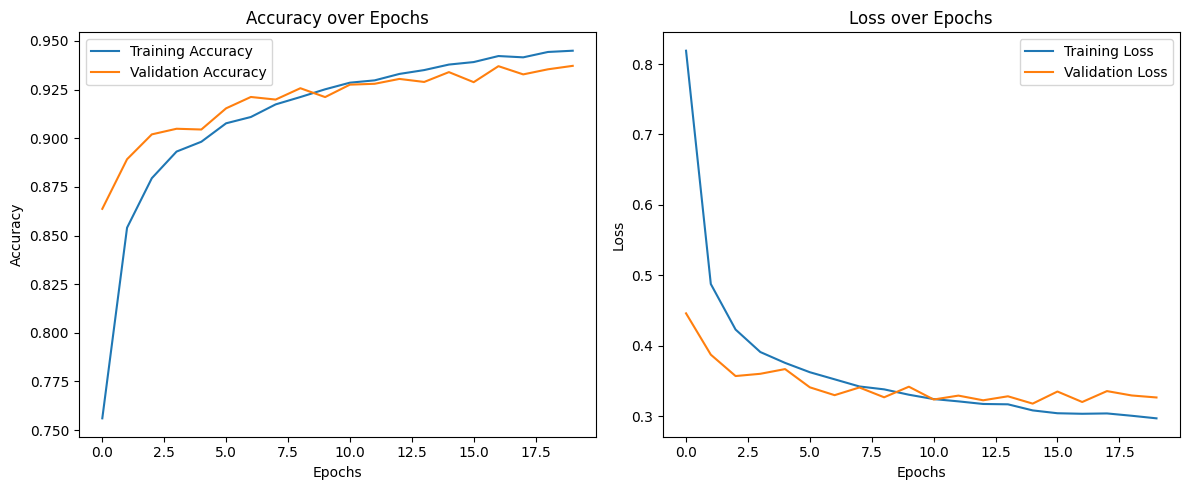

In [167]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [150]:
test = load_idx('/kaggle/input/pca-for-fashion-mnist-classification/t10k-images-idx3-ubyte')
submission = pd.read_csv('/kaggle/input/pca-for-fashion-mnist-classification/sample_submission.csv')
print(test.shape)

(10000, 28, 28)


In [151]:
test = test.reshape(-1,28,28,1)
test = test/255.0
print(test.shape)

(10000, 28, 28, 1)


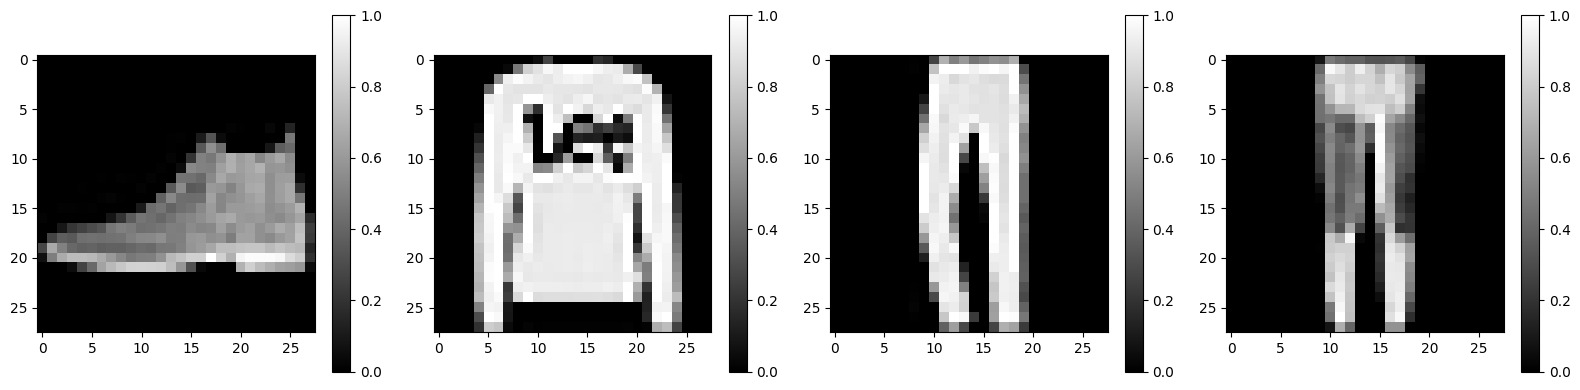

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(test[i] , cmap = 'gray')
    plt.colorbar()
    plt.grid(False)
plt.tight_layout() 
plt.show()

In [153]:
test_prediction = model.predict(test)
test_prediction = np.argmax(test_prediction, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [154]:
test_prediction

array([9, 2, 1, ..., 8, 1, 5])

In [155]:
print(submission.shape)

(10000, 2)


In [156]:
submission.head()

,ID,Prediction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [157]:
for i in range(len(submission)):
    submission.loc[i , 'Prediction'] = test_prediction[i]

In [158]:
submission.to_csv('submission_cnn2.csv', index=False)  # 'index=False' prevents saving the index column